<a href="https://colab.research.google.com/github/Belvinbarasa/Eng.barasa/blob/main/time_series_forecasting_with_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight') # For plots

In [ ]:
pjme = pd.read_csv('/content/PJME_hourly.csv', index_col=[0], parse_dates=[0]) # We set the index column and know it has dates

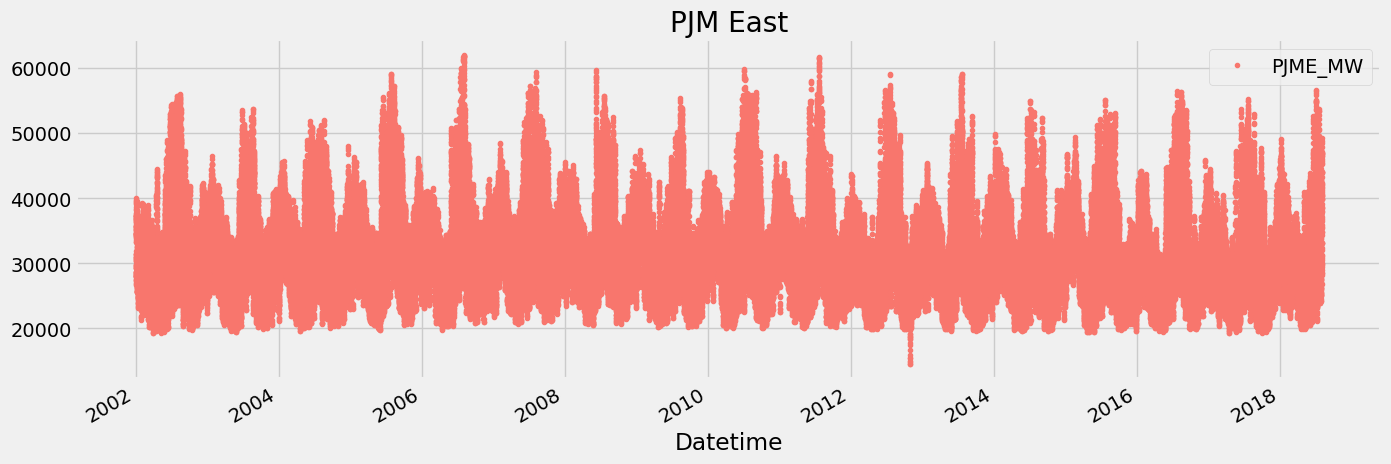

In [ ]:
# Color palltefor plotting
color_pal = ["#F8766D", "D39200", "#93AA00"
             "#00BA38", "00C19F", "#00B9E3",
             "#619CFF", "#DB72FB" ]
pjme.plot(style='.', figsize=(15,5), color=color_pal[0], title='PJM East')
plt.show()

In [ ]:
def create_features(df, label=None):
  """
  Creates time series features from datetime index.
  """
  df = df.copy()
  df['date'] = df.index
  df['hour'] = df['date'].dt.hour
  df['dayofweek'] = df['date'].dt.dayofweek
  df['quarter'] = df['date'].dt.quarter
  df['month'] = df['date'].dt.month
  df['year'] = df['date'].dt.year
  df['dayofyear'] = df['date'].dt.dayofyear
  df['dayofmonth'] = df['date'].dt.day
  df['weekofyear'] = df['date'].dt.isocalendar().week

  X= df[['hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear', 'dayofmonth', 'weekofyear']]
  if label:
       y = df[label]
       return X, y
  return X
x, y = create_features(pjme, label='PJME_MW')
features_and_target = pd.concat([x, y], axis=1)

In [ ]:
# See our features and target
features_and_target.head()

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,PJME_MW
Datetime,,,,,,,,,
2002-12-31 01:00:00,1,1,4,12,2002,365,31,1,26498.0
2002-12-31 02:00:00,2,1,4,12,2002,365,31,1,25147.0
2002-12-31 03:00:00,3,1,4,12,2002,365,31,1,24574.0
2002-12-31 04:00:00,4,1,4,12,2002,365,31,1,24393.0
2002-12-31 05:00:00,5,1,4,12,2002,365,31,1,24860.0


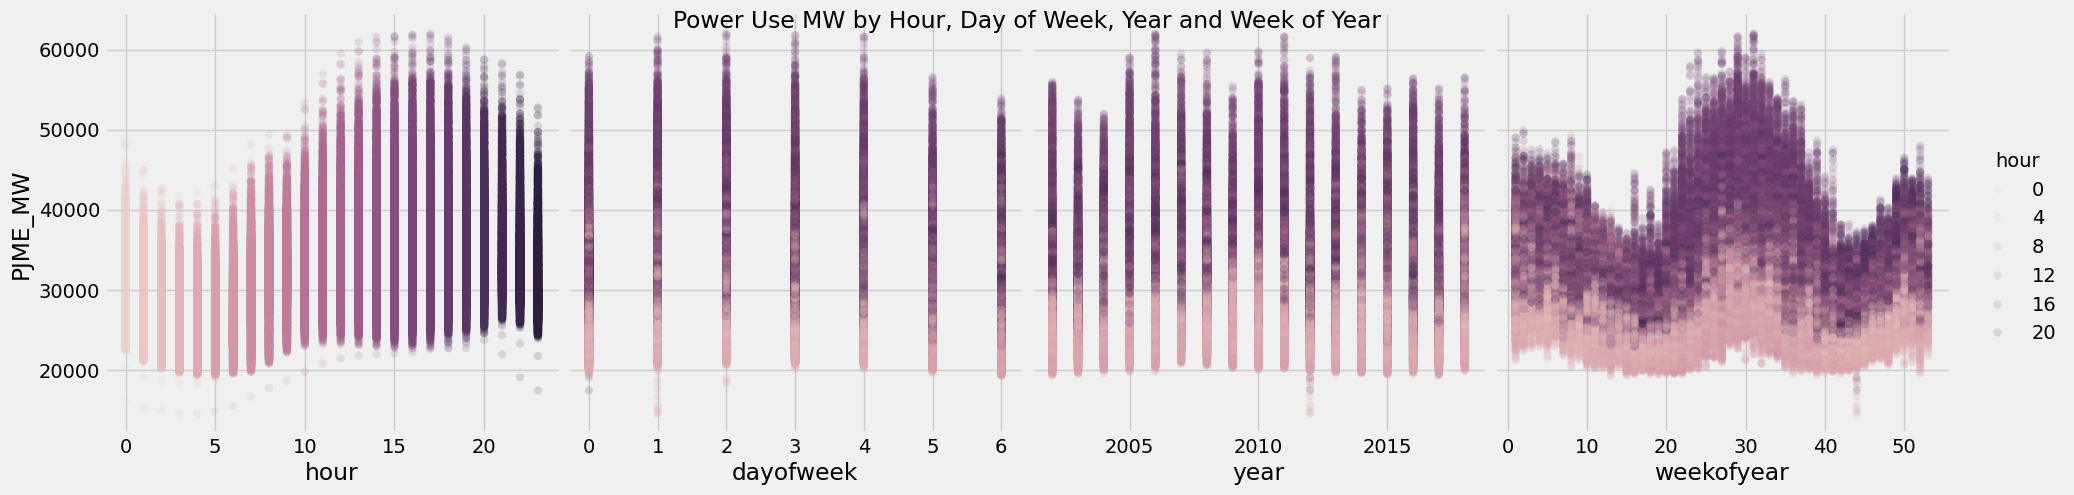

In [ ]:
sns.pairplot(features_and_target.dropna(),
             hue='hour',
             x_vars=['hour', 'dayofweek',
                     'year', 'weekofyear'],
             y_vars='PJME_MW',
             height=5,
             plot_kws={'alpha':0.15, 'linewidth':0}
             )
plt.suptitle('Power Use MW by Hour, Day of Week, Year and Week of Year')
plt.show()

In [ ]:
split_date = '01-Jan-2015'
pjme_train = pjme.loc[pjme.index <= split_date].copy()
pjme_test = pjme.loc[pjme.index > split_date].copy()

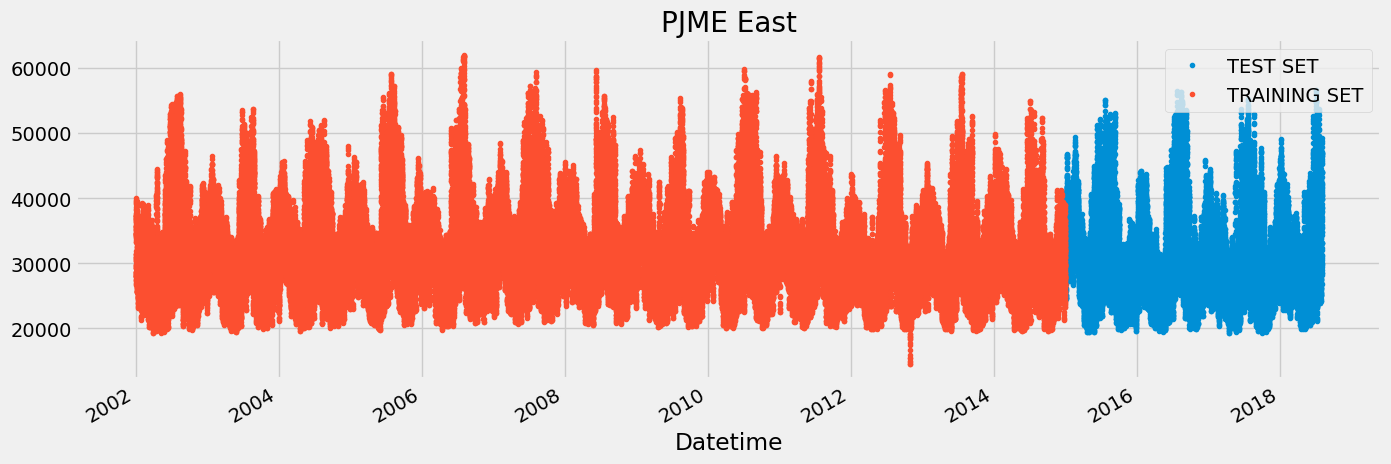

In [ ]:
# Plot train and test so you can see where we have split
pjme_test \
     .rename(columns={'PJME_MW': 'TEST SET'}) \
     .join(pjme_train.rename(columns={'PJME_MW': 'TRAINING SET'}),
           how='outer') \
     .plot(figsize=(15,5), title='PJME East', style='.' )
plt.show()

In [ ]:
# Format data for prophet model using ds and y
pjme_train.reset_index() \
     .rename(columns={'Datetime':'ds',
                      'PJME_MW' : 'y'}).head()

,ds,y
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [ ]:
# Assuming you want to use a portion of 'pjme' for training
# Adjust the split ratio (0.8 in this case) as needed
split_index = int(len(pjme) * 0.8)
pjme_train = pjme[:split_index]

# Setup and train model and fit
model = Prophet()
model.fit(pjme_train.reset_index() \
               .rename(columns={'Datetime': 'ds', 'PJME_MW': 'y'}))

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0oxe6ta6/bxp87l82.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0oxe6ta6/7azm6rt7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71080', 'data', 'file=/tmp/tmp0oxe6ta6/bxp87l82.json', 'init=/tmp/tmp0oxe6ta6/7azm6rt7.json', 'output', 'file=/tmp/tmp0oxe6ta6/prophet_model60789yeq/prophet_model-20250321091134.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:11:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:13:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Setup and train model and fit
model = Prophet()
model.fit(pjme_train.reset_index()\
               .rename(columns={'Datetime':'ds',
                                'PJME_MW':'y'}))

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0oxe6ta6/z7rnxl42.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0oxe6ta6/ls6d7rl_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99246', 'data', 'file=/tmp/tmp0oxe6ta6/z7rnxl42.json', 'init=/tmp/tmp0oxe6ta6/ls6d7rl_.json', 'output', 'file=/tmp/tmp0oxe6ta6/prophet_modelbn06jtv5/prophet_model-20250321085456.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:54:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:56:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Predict on training set with model
pjme_test_fcst = model.predict(df=pjme_test.reset_index()\
                                    .rename(columns={'Datetime':'ds'}))

In [ ]:
# Assuming 'pjme' contains your entire dataset
# Split the data into training and testing sets
train_size = int(len(pjme) * 0.8) # Use 80% of data for training
pjme_train = pjme[:train_size]
pjme_test = pjme[train_size:]

# Setup and train model and fit
model = Prophet()
model.fit(pjme_train.reset_index()\
               .rename(columns={'Datetime':'ds',
                                'PJME_MW':'y'}))

# Predict on training set with model
pjme_test_fcst = model.predict(df=pjme_test.reset_index()\
                                    .rename(columns={'Datetime':'ds'})) #Fixed typo 'Datatime' to 'Datetime'

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0oxe6ta6/9clkg8in.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0oxe6ta6/ai8vcph6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24939', 'data', 'file=/tmp/tmp0oxe6ta6/9clkg8in.json', 'init=/tmp/tmp0oxe6ta6/ai8vcph6.json', 'output', 'file=/tmp/tmp0oxe6ta6/prophet_modelg5lc4mo_/prophet_model-20250321091423.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:14:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:15:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
pjme_test_fcst.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01 01:00:00,30771.767127,23310.927081,32238.601307,30771.767127,30771.767127,-3061.105348,-3061.105348,-3061.105348,-4414.282892,...,1267.803439,1267.803439,1267.803439,85.374105,85.374105,85.374105,0.0,0.0,0.0,27710.661779
1,2015-01-01 02:00:00,30771.689504,21812.965432,30592.241622,30771.689504,30771.689504,-4558.595600,-4558.595600,-4558.595600,-5903.746445,...,1258.081123,1258.081123,1258.081123,87.069722,87.069722,87.069722,0.0,0.0,0.0,26213.093904
2,2015-01-01 03:00:00,30771.611880,20559.271535,29567.482238,30771.611880,30771.611880,-5427.911486,-5427.911486,-5427.911486,-6763.885965,...,1247.167209,1247.167209,1247.167209,88.807270,88.807270,88.807270,0.0,0.0,0.0,25343.700394
3,2015-01-01 04:00:00,30771.534257,20758.629327,29699.803270,30771.534257,30771.534257,-5567.984574,-5567.984574,-5567.984574,-6893.762321,...,1235.190980,1235.190980,1235.190980,90.586767,90.586767,90.586767,0.0,0.0,0.0,25203.549683
4,2015-01-01 05:00:00,30771.456634,21704.168534,30400.096620,30771.456634,30771.456634,-4890.230099,-4890.230099,-4890.230099,-6204.932239,...,1222.293914,1222.293914,1222.293914,92.408226,92.408226,92.408226,0.0,0.0,0.0,25881.226534


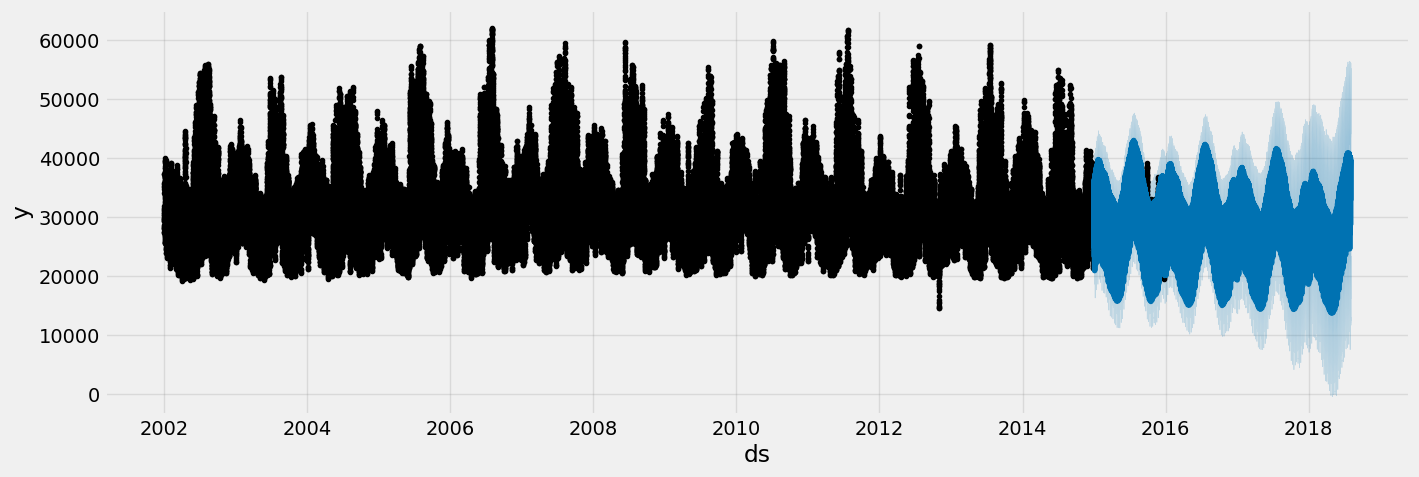

In [ ]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(pjme_test_fcst,
                  ax=ax)

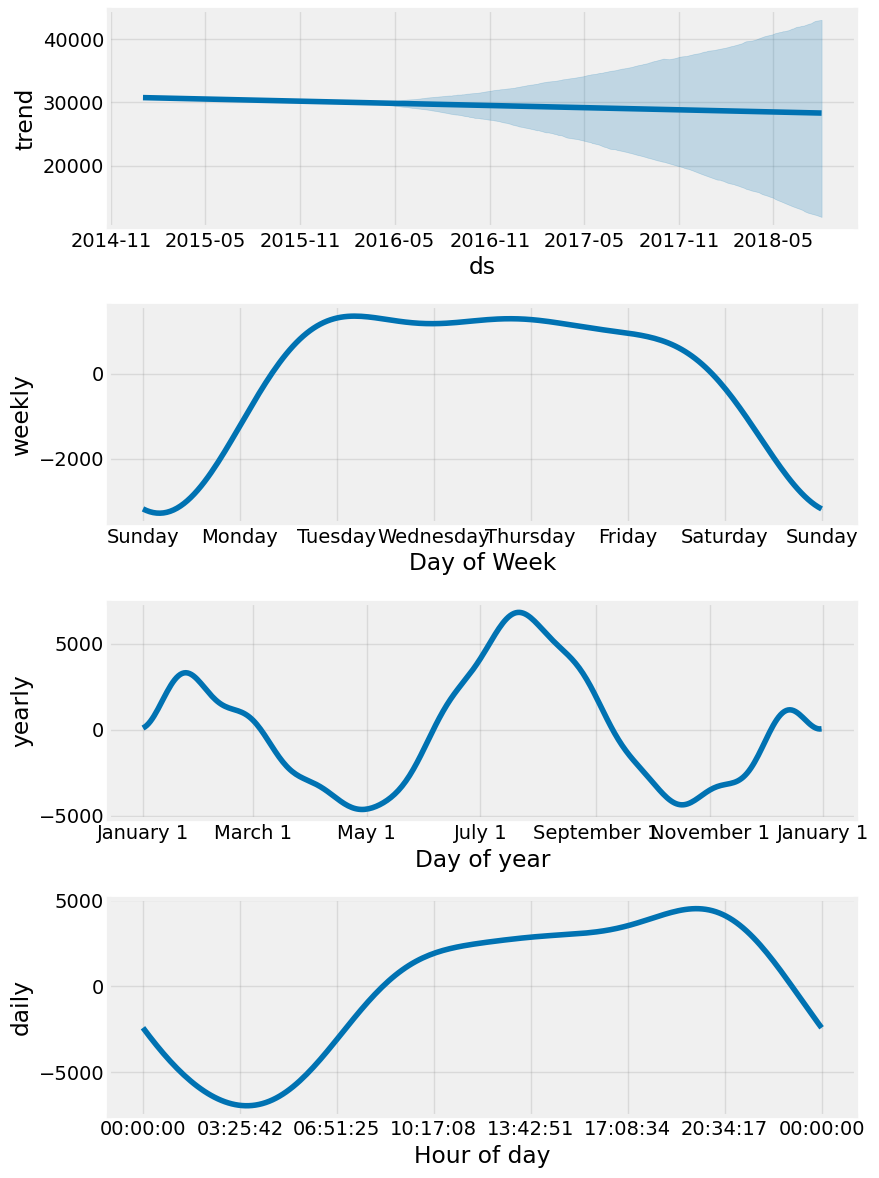

In [ ]:
# plot the components of the model
fig = model.plot_components(pjme_test_fcst)

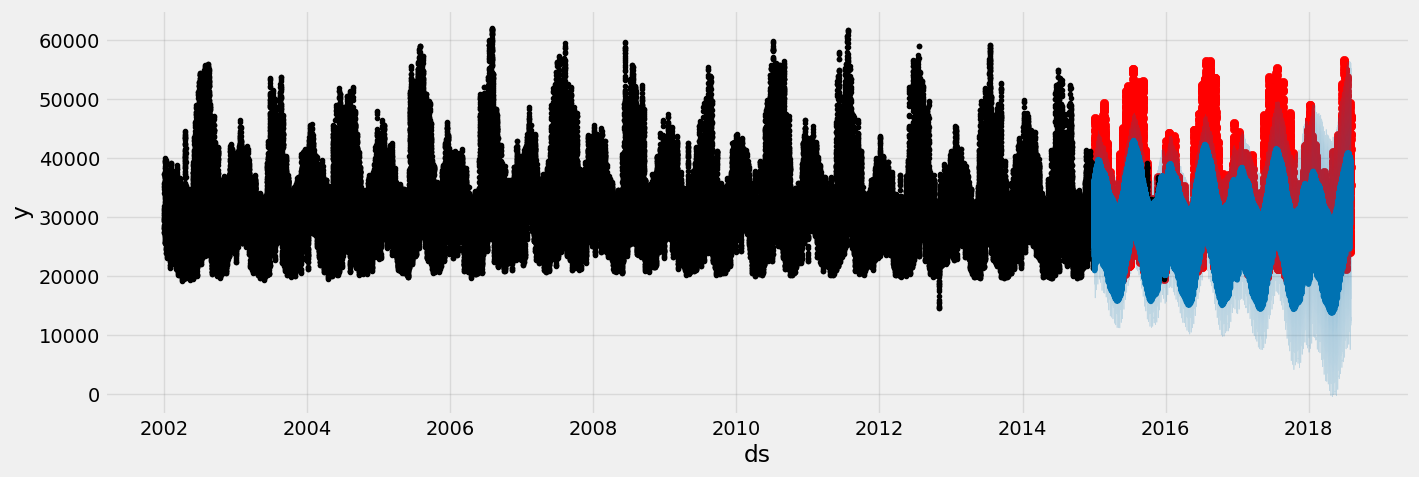

In [ ]:
# plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(pjme_test.index, pjme_test['PJME_MW'], color='r')
fig = model.plot(pjme_test_fcst, ax=ax)

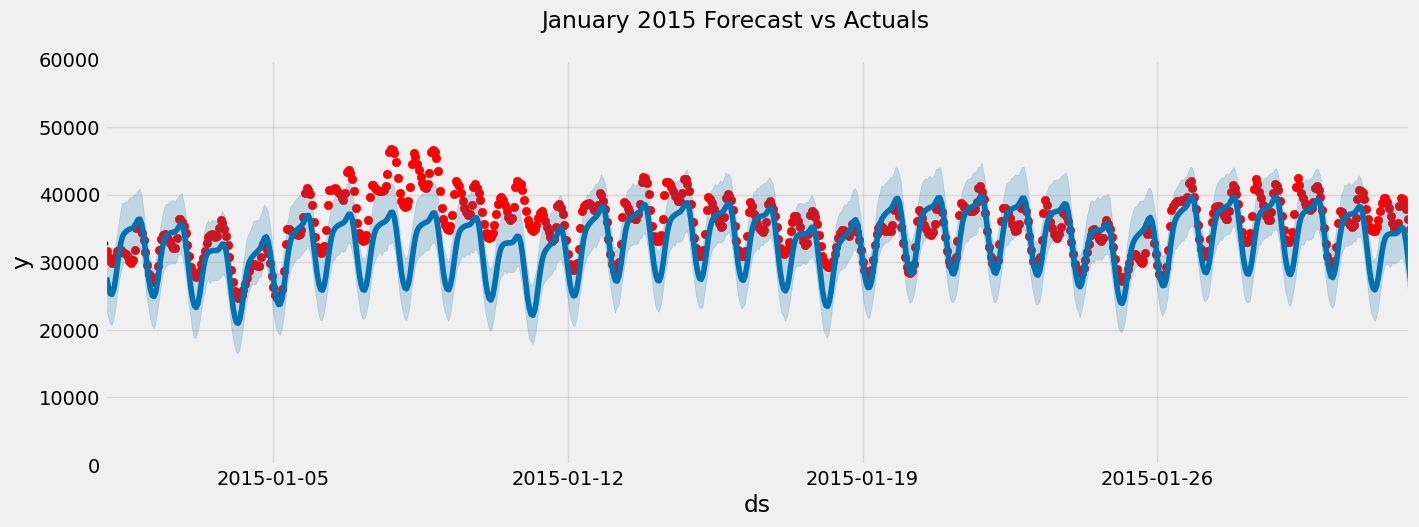

In [ ]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(pjme_test.index, pjme_test['PJME_MW'], color='r')
fig = model.plot(pjme_test_fcst, ax=ax)

# Convert date strings to datetime objects for xbound
lower_date = pd.to_datetime('01-01-2015')
upper_date = pd.to_datetime('02-01-2015')

# Set xbound using datetime objects
ax.set_xbound(lower=lower_date, upper=upper_date)
ax.set_ylim(0, 60000)
plot = plt.suptitle('January 2015 Forecast vs Actuals')
plt.show() # explicitly show the plot

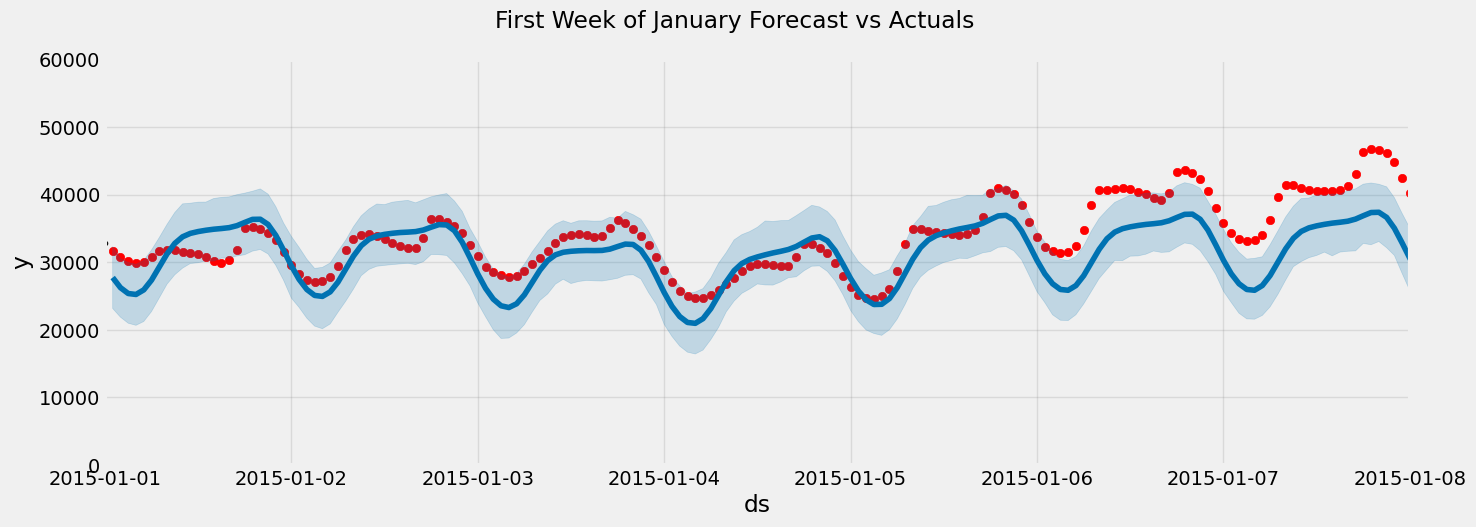

In [ ]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(pjme_test.index, pjme_test['PJME_MW'], color='r')
fig = model.plot(pjme_test_fcst, ax=ax)

# Convert date strings to datetime objects for xbound
lower_date = pd.to_datetime('01-01-2015')
upper_date = pd.to_datetime('01-08-2015')

# Set xbound using datetime objects
ax.set_xbound(lower=lower_date, upper=upper_date)
ax.set_ylim(0, 60000)
plot = plt.suptitle('First Week of January Forecast vs Actuals')
plt.show() # explicitly show the plot


In [ ]:
mean_squared_error(y_true=pjme_test['PJME_MW'],
                   y_pred=pjme_test_fcst['yhat'])

46663971.02896509

In [ ]:
mean_absolute_error(y_true=pjme_test['PJME_MW'],
                    y_pred=pjme_test_fcst['yhat'])

5319.444193422652

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
  """Calculate MAPE given y_true and y_pred"""
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mean_absolute_percentage_error(y_true=pjme_test['PJME_MW'],
                                 y_pred=pjme_test_fcst['yhat'])

np.float64(16.671098415530157)

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
  # Calculates MAPE given y_true and y_pred
  y_true, y_pred = np.array(y_true), np.array (y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) *100

mean_absolute_percentage_error(y_true=pjme_test['PJME_MW'],
                               y_pred=pjme_test_fcst['yhat'])

np.float64(16.671098415530157)

In [ ]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calender

cal = calender()
train_holidays = cal.holidays(start=pjme_train.index.min(),
                              end=pjme_train.index.max())
test_holidays = cal.holidays(start=pjme_test.index.min(),
                             end=pjme_test.index.max())

In [ ]:
#Create a dataframe with holiday,ds columns
pjme['date'] = pjme.index.date
pjme['is_holiday'] = pjme['date'].isin([d.date()for d in cal.holidays()])
holiday_df = pjme.loc[pjme['is_holiday']] \
     .reset_index() \
     .rename(columns={'Datetime':'ds'})
holiday_df['holiday'] = 'USFederalHoliday'
holiday_df = holiday_df.drop(['PJME_MW','date','is_holiday'], axis=1)
holiday_df.head()

,ds,holiday
0,2003-01-01 00:00:00,USFederalHoliday
1,2002-12-25 01:00:00,USFederalHoliday
2,2002-12-25 02:00:00,USFederalHoliday
3,2002-12-25 03:00:00,USFederalHoliday
4,2002-12-25 04:00:00,USFederalHoliday


In [ ]:
holiday_df['ds'] = pd.to_datetime(holiday_df['ds'])

In [ ]:
# Set up and train model with holidays
model_with_holidays = Prophet(holidays=holiday_df)
model_with_holidays.fit(pjme_train.reset_index() \
                             .rename(columns={'Datetime': 'ds',
                                              'PJME_MW':'y'}))

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0oxe6ta6/8hel1ztv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0oxe6ta6/dv0dlsq0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19623', 'data', 'file=/tmp/tmp0oxe6ta6/8hel1ztv.json', 'init=/tmp/tmp0oxe6ta6/dv0dlsq0.json', 'output', 'file=/tmp/tmp0oxe6ta6/prophet_modelvoem8mp9/prophet_model-20250321112255.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:22:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:25:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Predict on training set with model
pjme_test_fcst_with_hols = \
    model_with_holidays.predict(df=pjme_test.reset_index() \
                                     .rename(columns={'Datetime' : 'ds'}))

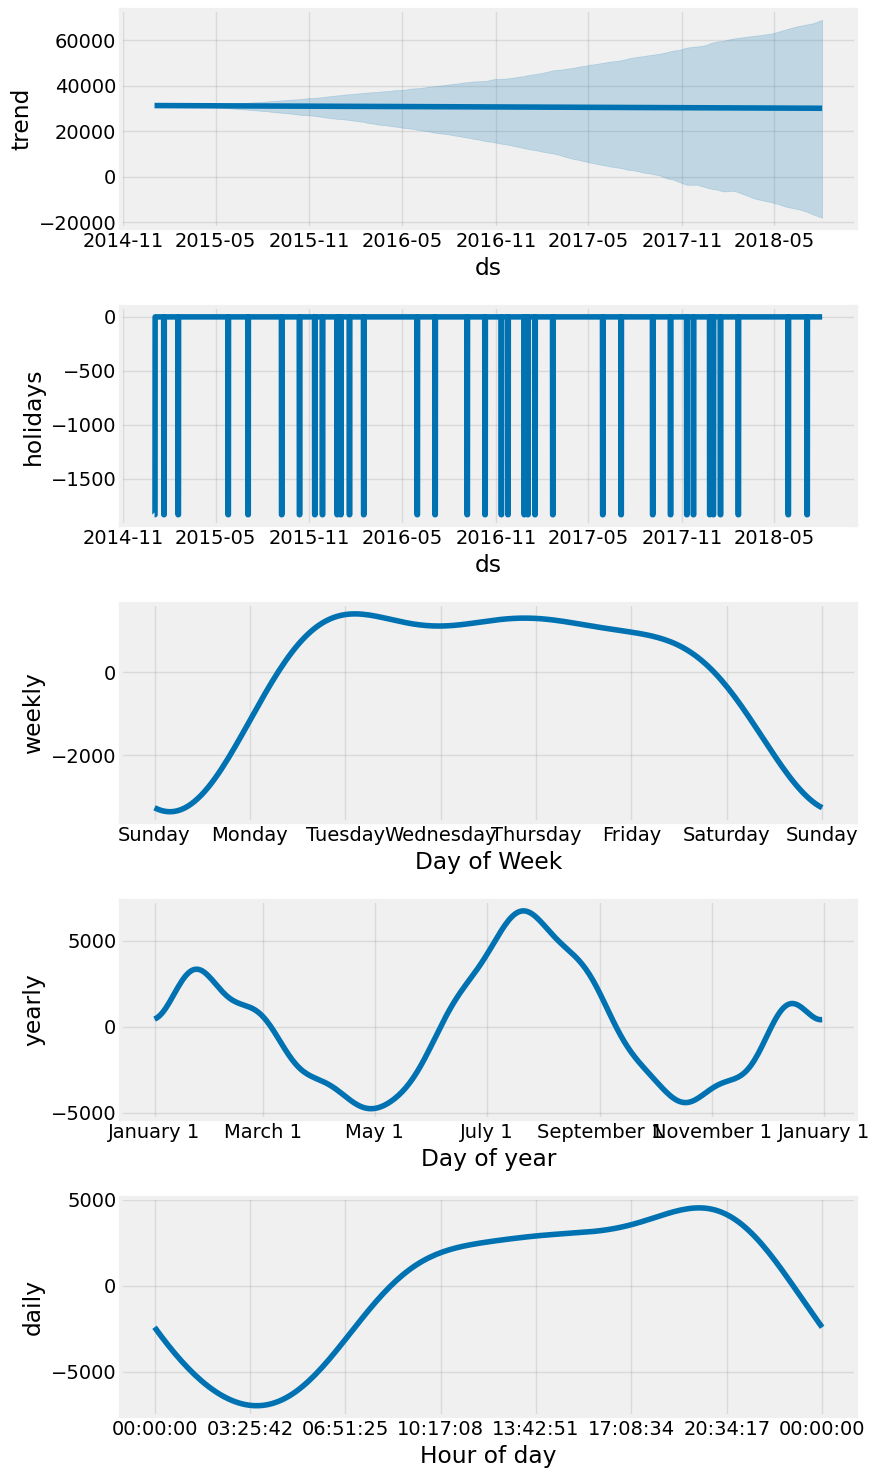

In [ ]:
fig2 = model_with_holidays.plot_components(pjme_test_fcst_with_hols)

In [ ]:
mean_squared_error(y_true=pjme_test['PJME_MW'],
                   y_pred=pjme_test_fcst_with_hols['yhat'])

43957492.85018296

In [ ]:
mean_absolute_error(y_true=pjme_test['PJME_MW'],
                    y_pred=pjme_test_fcst_with_hols['yhat'])

5192.348054859118

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
      # Calculates MAPE given y_true and y_pred
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_true=pjme_test['PJME_MW'],
                               y_pred=pjme_test_fcst_with_hols['yhat'])

np.float64(16.541420012252114)

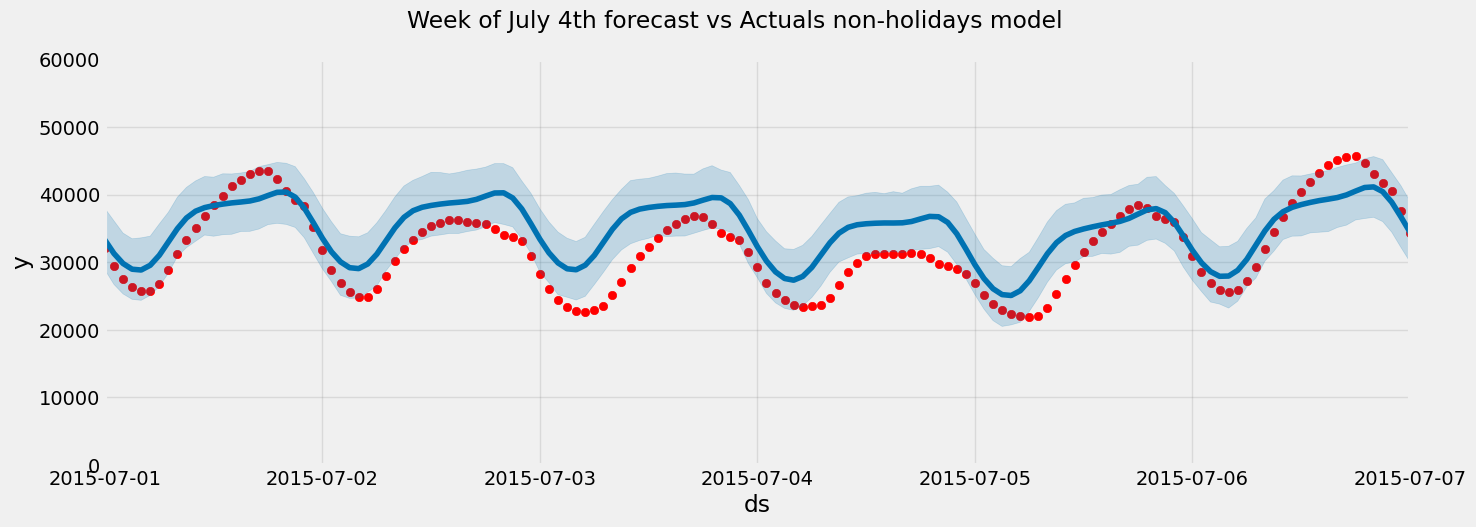

In [ ]:
#Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(pjme_test.index, pjme_test['PJME_MW'],color='r')
fig = model.plot(pjme_test_fcst, ax=ax)
ax.set_xbound(lower=pd.to_datetime('07-01-2015'),
              upper=pd.to_datetime('07-7-2015'))
ax.set_ylim(0,60000)
plot = plt.suptitle('Week of July 4th forecast vs Actuals non-holidays model')

In [ ]:
jul4_test = pjme_test.query('Datetime >= 20160407 and Datetime < 20160408')
jul4_pred = pjme_test_fcst.query('ds >= 20160407 and ds < 20160408')
jul4_pred_holiday_model = pjme_test_fcst_with_hols.query('ds >=20160407 and ds < 20160408')

In [ ]:
mean_absolute_error(y_true=jul4_test['PJME_MW'],
                    y_pred=jul4_pred['yhat'])

2064.7993376991753

In [ ]:
mean_absolute_error(y_true=jul4_test['PJME_MW'],
                    y_pred=jul4_pred_holiday_model['yhat'])

2149.495833083406

In [ ]:
holiday_list = holiday_df['ds'].tolist()

In [ ]:
hols_test = pjme_test.query('Datetime in @holiday_list')
hols_pred = pjme_test_fcst.query('ds in @holiday_list')
hols_pred_holiday_model = pjme_test_fcst_with_hols.query('ds in @holiday_list')

In [ ]:
mean_absolute_error(y_true=hols_test['PJME_MW'],
                    y_pred=hols_pred['yhat'])

5207.26226144123

In [ ]:
mean_absolute_error(y_true=hols_test['PJME_MW'],
                    y_pred=hols_pred_holiday_model['yhat'])

5115.2409876098545

In [ ]:
holiday_df['date'] = holiday_df['ds'].dt.date

for hol, d in holiday_df.groupby('date'):
  holiday_list = d['ds'].tolist()
  hols_test = pjme_test.query('Datetime in @holiday_list')
  if len(hols_test) == 0:
     continue
  hols_pred = pjme_test_fcst_with_hols.query('ds in @holiday_list')
  hols_pred_holiday_model = pjme_test_fcst_with_hols.query('ds in @holiday_list')
  non_hol_error = mean_absolute_error(y_true=hols_test['PJME_MW'],
                                      y_pred=hols_pred['yhat'])
  hol_model_error = mean_absolute_error(y_true=hols_test['PJME_MW'],
                                       y_pred=hols_pred_holiday_model['yhat'])
  diff = non_hol_error - hol_model_error
  print(f'Holiday: {hol:%8 %d, %Y}:       \n MAE (non-holiday model): {non_hol_error:0.1f} \n MAE(Holiday Model):{hol_model_error:0.1f} \n Diff {diff:0.1f}')

Holiday:      %8 01, 2015:       
 MAE (non-holiday model): 2671.1 
 MAE(Holiday Model):2671.1 
 Diff 0.0
Holiday:      %8 19, 2015:       
 MAE (non-holiday model): 2088.2 
 MAE(Holiday Model):2088.2 
 Diff 0.0
Holiday:      %8 16, 2015:       
 MAE (non-holiday model): 12793.5 
 MAE(Holiday Model):12793.5 
 Diff 0.0
Holiday:      %8 25, 2015:       
 MAE (non-holiday model): 1626.1 
 MAE(Holiday Model):1626.1 
 Diff 0.0
Holiday:      %8 03, 2015:       
 MAE (non-holiday model): 4295.6 
 MAE(Holiday Model):4295.6 
 Diff 0.0
Holiday:      %8 07, 2015:       
 MAE (non-holiday model): 4321.7 
 MAE(Holiday Model):4321.7 
 Diff 0.0
Holiday:      %8 12, 2015:       
 MAE (non-holiday model): 1883.0 
 MAE(Holiday Model):1883.0 
 Diff 0.0
Holiday:      %8 11, 2015:       
 MAE (non-holiday model): 1586.2 
 MAE(Holiday Model):1586.2 
 Diff 0.0
Holiday:      %8 26, 2015:       
 MAE (non-holiday model): 3777.5 
 MAE(Holiday Model):3777.5 
 Diff 0.0
Holiday:      %8 25, 2015:       
 MAE (non-

<function matplotlib.pyplot.show(close=None, block=None)>

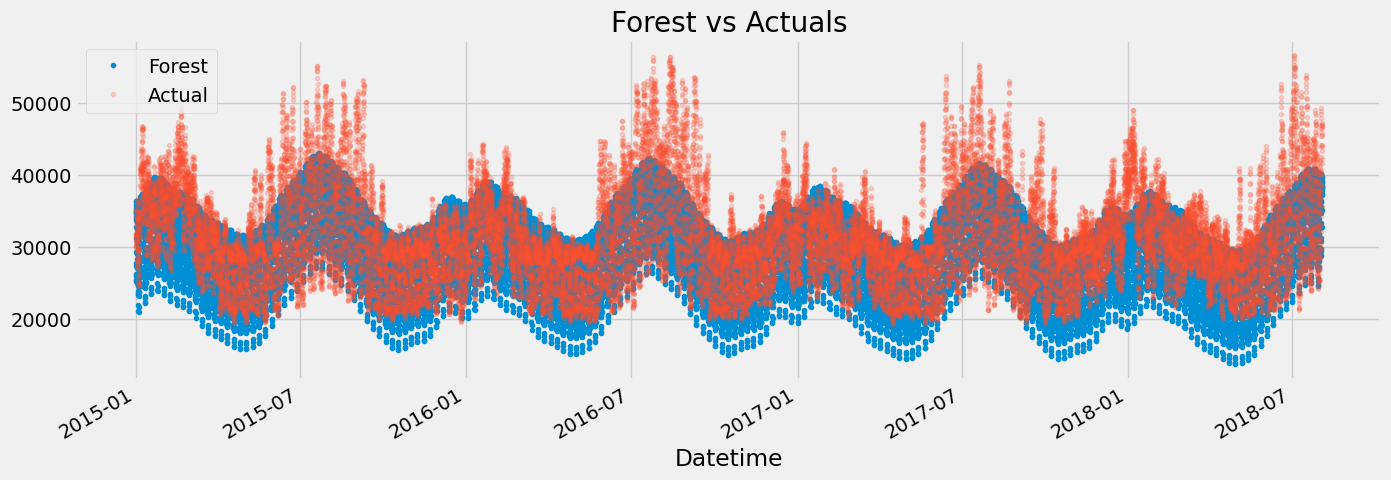

In [ ]:
ax = pjme_test_fcst.set_index('ds')['yhat'].plot(figsize=(15, 5),
                                                 lw=0,
                                                 style='.')
pjme_test['PJME_MW'].plot(ax=ax,
                          style='.',
                          lw=0,
                          alpha=0.2)
plt.legend(['Forest', 'Actual'])
plt.title('Forest vs Actuals')
plt.show

<Axes: title={'center': 'PJME_MW with bad data highlighted'}, xlabel='Datetime'>

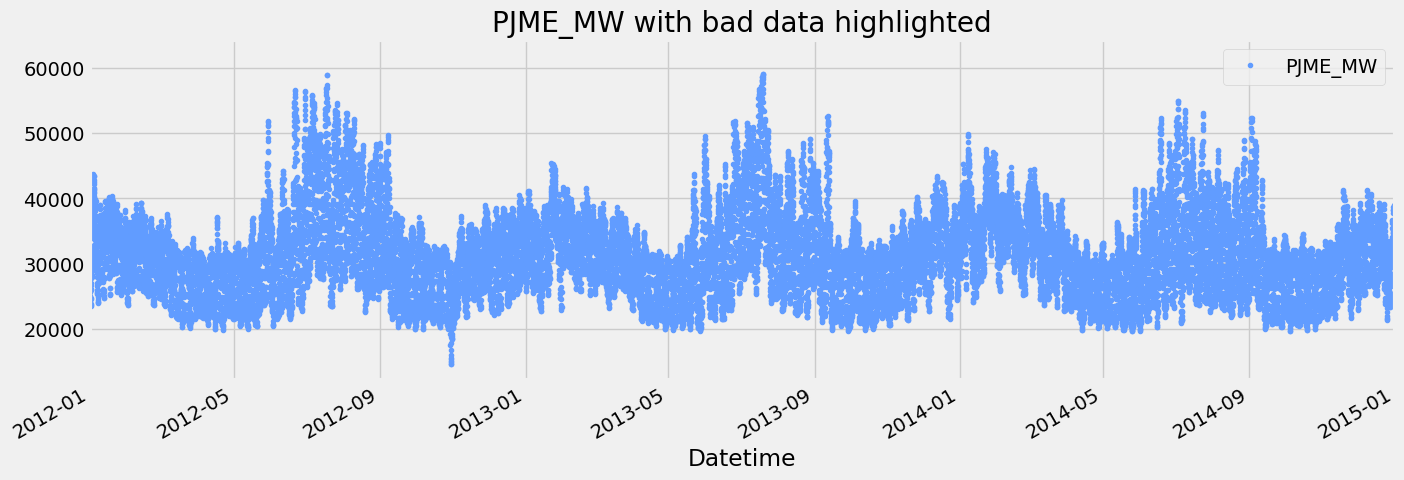

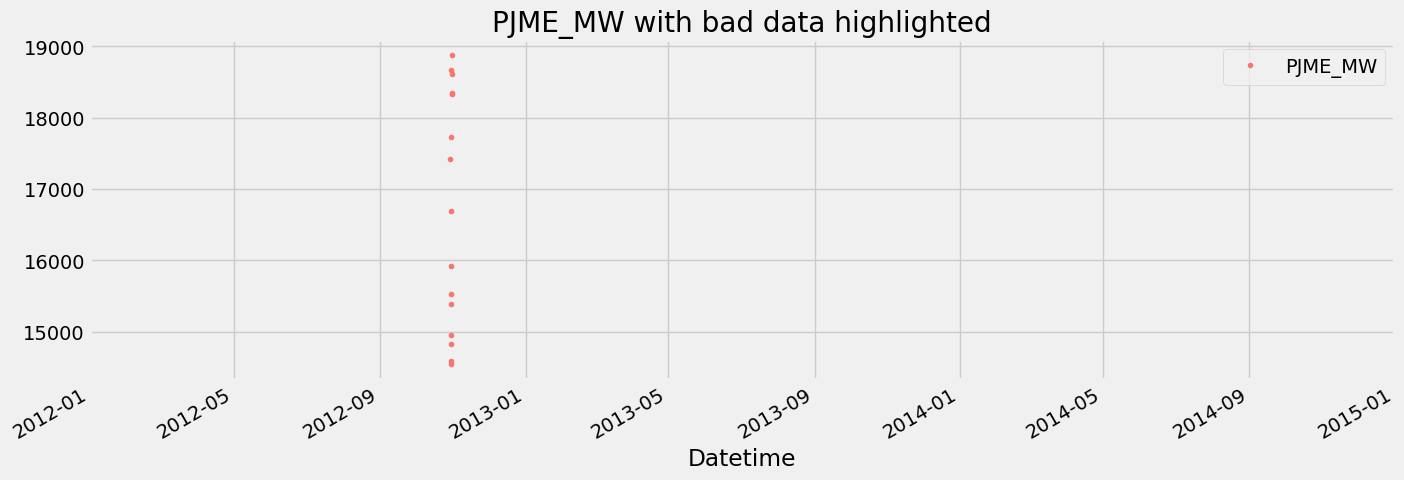

In [ ]:
ax = pjme_train.plot(style='.',
                     figsize=(15, 5),
                     color=color_pal[5],
                     title='PJME_MW with bad data highlighted',
                     xlim=('01-01-2012', '01-01-2015'))
pjme_train.query('PJME_MW < 19000').plot(style='.',
                                              figsize=(15, 5),
                                               color=color_pal[0],
                                              title='PJME_MW with bad data highlighted',
                                              xlim=('01-01-2012', '01-01-2015'))

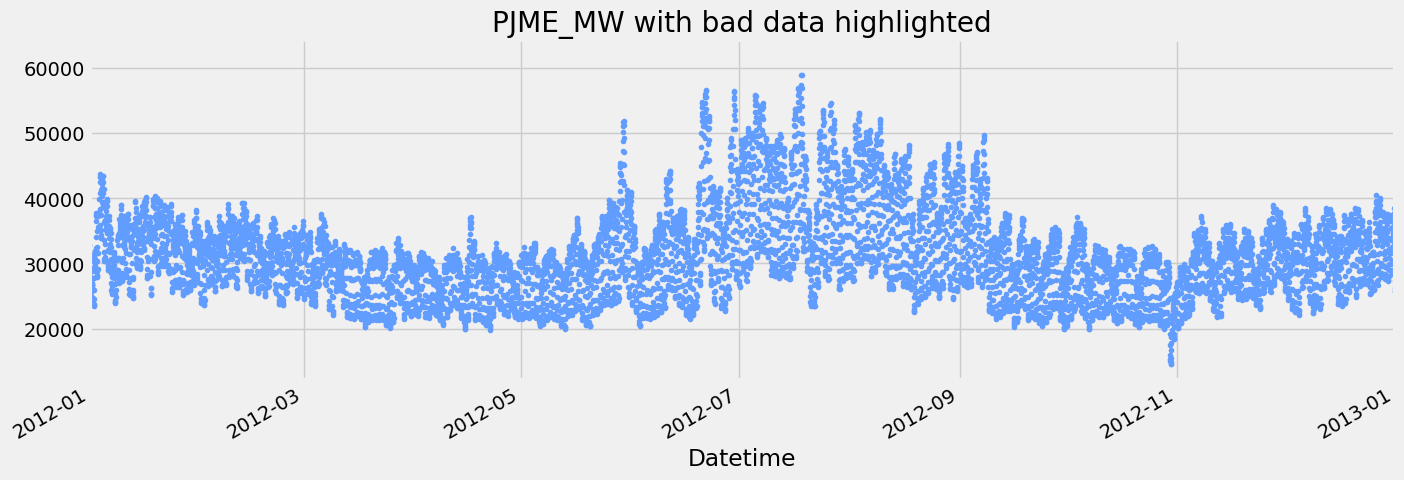

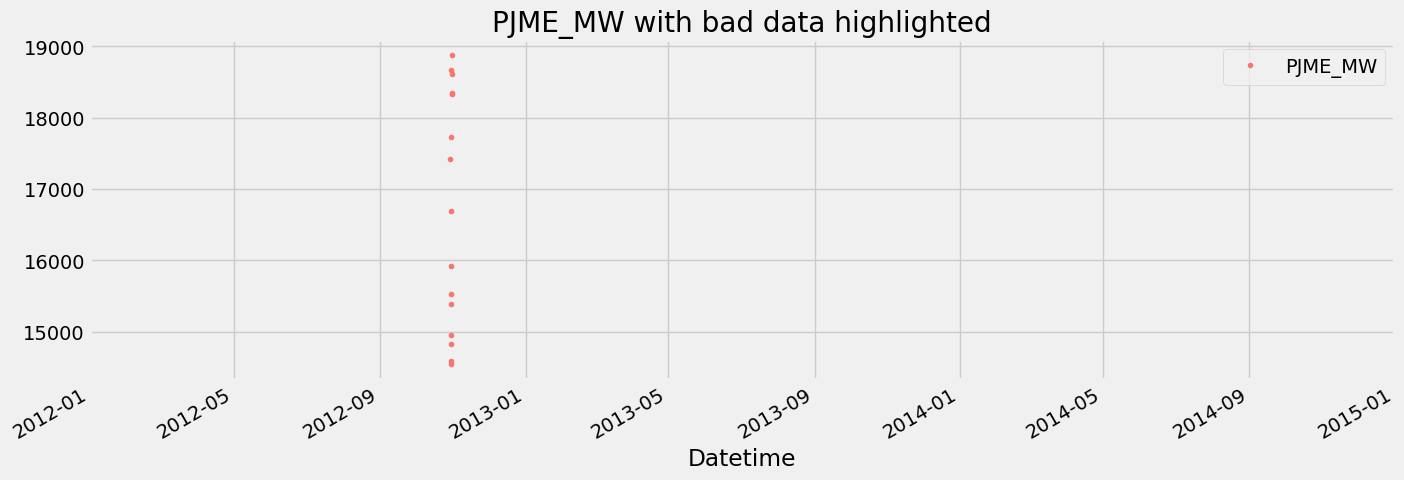

In [ ]:
ax = pjme_train.plot(style='.',
                     figsize=(15, 5),
                     color=color_pal[5],
                     title='PJME_MW with bad data highlighted',
                     xlim=('01-01-2012', '01-01-2013'))
pjme_train.query('PJME_MW < 19000').plot(style='.',
                                         figsize=(15, 5),
                                               color=color_pal[0],
                                              title='PJME_MW with bad data highlighted',
                                              xlim=('01-01-2012', '01-01-2015'))
# ax.legend(().set_visible(false))  # Remove or modify this line
ax.get_legend().remove()  # This will remove the legend
plt.show()